# **CNN** (Convolutional Nueral Network) and **Pooling** from scratch using Pytorch

In this notebook we will tyr to recrate the nn.Conv2D class from pytorch and a max pooling layer. we will use the MNIST dataset that has 28 x 28 images of digits. Whats good about it is that it has only 1 channel (whiteness? if you can say so, basicly the images are black and white)

We will create a Neural Network to recognize this handwritten digits :)


In [1]:
# importing needed libraries
import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
import torch.optim as optim
import pandas
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import torchvision
import torchvision.datasets as datasets
from torchvision.transforms import ToTensor, ToPILImage


In [2]:
#for our example lets use mnist dataset, each image 28 x 28 pixels and is defined only with grayscale

mnist_dataset_train = datasets.MNIST(
    root='./data/', # place to store out images
    train=True,
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # we dont need to transform our labels
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:02<00:00, 4.57MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 64.9kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:06<00:00, 243kB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.55MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:

image, label = mnist_dataset_train[0]
mnist_dataloader = DataLoader(dataset=mnist_dataset_train, batch_size=1)
print(image.shape) # whats the shape of the image
print(label)

torch.Size([1, 28, 28])
5


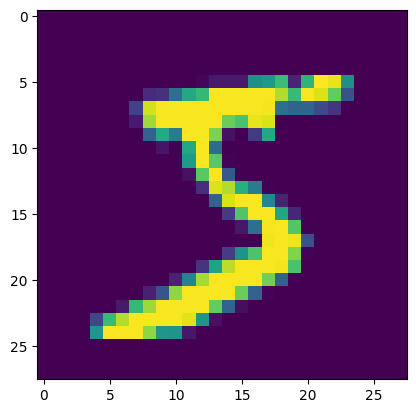

torch.Size([5, 1, 24, 24])
torch.Size([1, 24, 24])
False


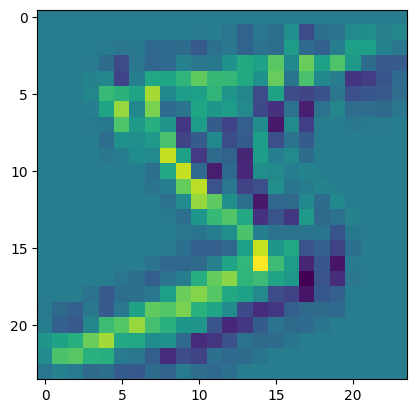

torch.Size([1, 24, 24])
False


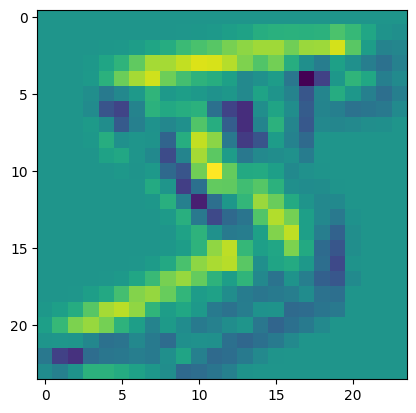

torch.Size([1, 24, 24])
False


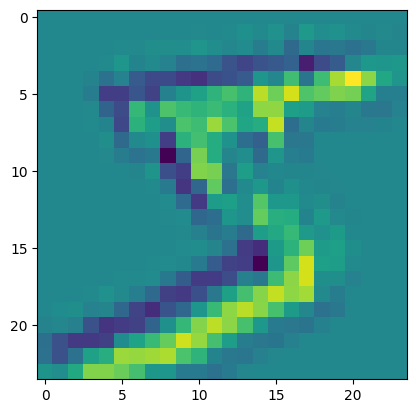

torch.Size([1, 24, 24])
False


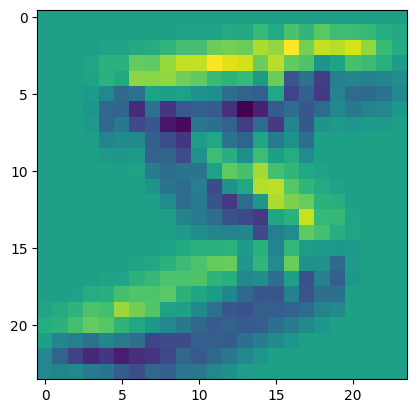

torch.Size([1, 24, 24])
False


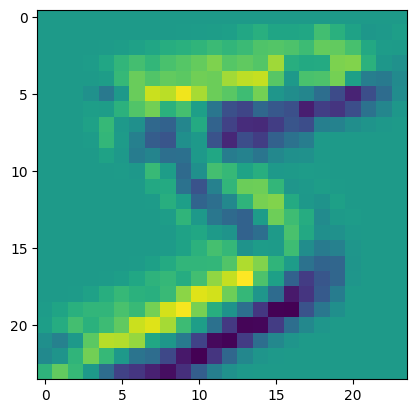

In [4]:
torch.manual_seed(143) # to always get the same result

# lets define a convolutional layer

class Conv_layer(nn.Module):

  def __init__(self, num_inputs=1, num_outputs=1, stride=1, kernel_size=3):
    super(Conv_layer, self).__init__()
    self.stride= stride # the distance the the kernel(filter) moves
    self.num_inputs = num_inputs # the number of the images we get
    self.num_outputs = num_outputs # the number of images we return
    self.kernel_size = kernel_size
    self.kernels = torch.randn(self.num_outputs, self.num_inputs, self.kernel_size, self.kernel_size) # create num_outputs kernels that will each have shape (num_inputs, kernel_size, kernel_size) for more simple multiplication
    #print(self.kernels)


  def forward(self, img):
    H,W =img.shape[2], img.shape[3] # img.shape[0] is num_inputs
    out_H = (H - self.kernel_size)//self.stride + 1
    out_W = (W - self.kernel_size)//self.stride + 1
    out = torch.zeros(self.num_outputs,1, out_H, out_W) # outputs we consider only 1 channel

    for i in range(0, H-self.kernel_size+1,self.stride):
      for j in range(0, W-self.kernel_size+1, self.stride):
        cur_matrix = img[:,:,i:i+self.kernel_size,j:j+self.kernel_size] # shape = (5, 1, kernel_size, kernel_size)
        #convoluted = [F.relu(torch.sum(cur_matrix * kernel.view(1,1,self.kernel_size,self.kernel_size),dim = 0)) for kernel in self.kernels]
        convoluted = []
        for idx,kernel in enumerate(self.kernels):
          mult_res = cur_matrix * kernel.view(self.num_inputs,1,self.kernel_size, self.kernel_size)
          sum_res = mult_res.sum()
          out[idx,0,i//self.stride,j//self.stride] = sum_res
          # make the sum over all of the things

        #for idx,res in enumerate(convoluted):
          #out[idx,:,i:i+self.kernel_size,j:j+self.kernel_size] += res

    return out




images, labels = next(iter(mnist_dataloader)) # get only 1 batch
# images shape is batch_size, 1, 28, 28
conv = Conv_layer(num_inputs = 1, num_outputs=3, stride = 1, kernel_size = 3)

img = plt.imshow(images[0].view(28,28).numpy())
plt.show()

res = conv(images[0].view(1,1,28,28))
cnv2 = Conv_layer(num_inputs=3,num_outputs=5, kernel_size=3)
ress = cnv2(res)
print(ress.shape)

for resss in ress:
  print(resss.shape)
  h = resss.shape[1]
  img2 = plt.imshow(resss.view(h,h).numpy())
  print(torch.equal(resss.view(h,h),images[0].view(28,28)))
  plt.show()





torch.Size([1, 22, 22])


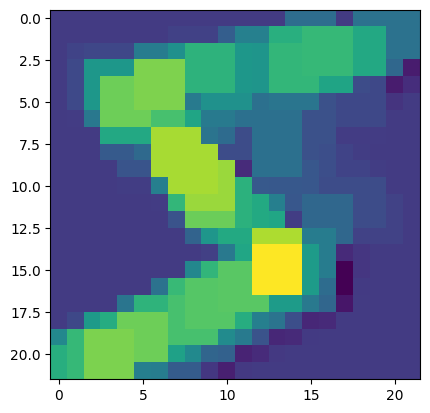

torch.Size([1, 22, 22])


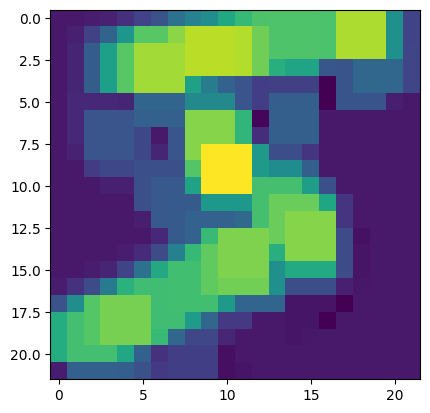

torch.Size([1, 22, 22])


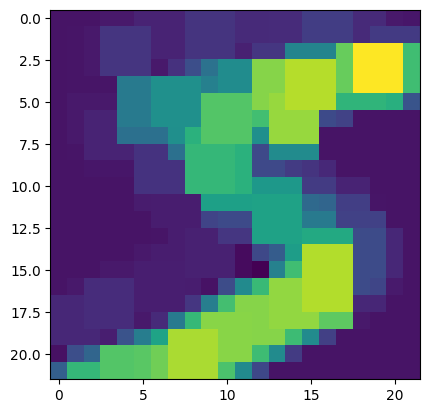

torch.Size([1, 22, 22])


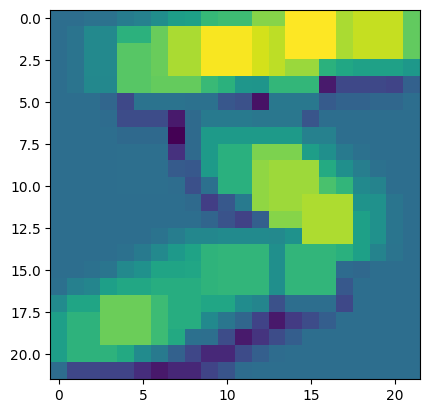

torch.Size([1, 22, 22])


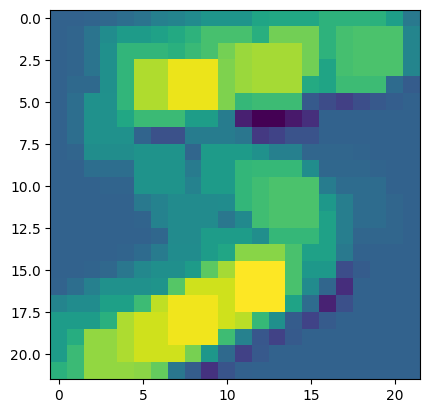

In [5]:
# creating a max pool layer (very similar to convolution layer)

class Max_pool(nn.Module):

  def __init__(self, kernel_size, stride=1):
    super(Max_pool, self).__init__()
    self.kernel_size = kernel_size
    self.stride = stride

  def forward(self, x):
    B,C,H,W = x.shape
    out_H = (H - self.kernel_size)//self.stride + 1
    out_W = (W - self.kernel_size)//self.stride + 1
    out = torch.zeros(B,1,out_H,out_W)
    for i in range(0,H - self.kernel_size + 1,self.stride):
      for j in range(0,W - self.kernel_size + 1,self.stride):
        cur_matrix = x[:,:,i:i+self.kernel_size,j:j+self.kernel_size]
        max_ = torch.amax(cur_matrix, dim = (2,3)) # get the max element in each window
        for idx,mx in enumerate(max_):
          out[idx,0,i//self.stride,j//self.stride] = mx

    return out


mx_pool = Max_pool(3,stride=1)
mx_pool_res= mx_pool(ress)
for p in mx_pool_res:
  print(p.shape)
  img3 = plt.imshow(p.squeeze(0).numpy())
  plt.show()


In [6]:
# creating the CNN

class CNN(nn.Module):
  def __init__(self, kernel_size, stride, pool_size,pool_stride):
    super(CNN, self).__init__()

    self.conv1 = Conv_layer(num_inputs=1, num_outputs=5, kernel_size=kernel_size, stride=stride)
    self.conv2 = Conv_layer(num_inputs=5, num_outputs=10, kernel_size=kernel_size, stride=stride)
    self.max_pool1 = Max_pool(pool_size, stride=pool_stride)
    self.max_pool2 = Max_pool(pool_size, stride=pool_stride)
    self.fc1 = nn.Linear(160, 28) # fully connected layer
    self.fc2 = nn.Linear(28, 10) # layer to get 10 outputs (probs for each digit)

  def forward(self, x):
    x.view(x.shape[0],1,28,28)
    x = F.relu(self.max_pool1(self.conv1.forward(x)))
    x = F.relu(self.max_pool2(self.conv2.forward(x)))
    x = x.view(-1, 160)
    x = self.fc1(x)
    x = self.fc2(x)
    return F.log_softmax(x)

Conv_nn = CNN( 5, 1, 2,2)
ans = Conv_nn(images[0].view(1,1,28,28))
print(torch.argmax(ans))

tensor(9)


<ipython-input-6-09f8f25ff8e7>:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


In [7]:
# traing the model

batch_size = 1
lr = 0.001
model= CNN( 5, 1,2,2)
optimizer = torch.optim.Adam(params=model.parameters(), lr = lr)
criterion = nn.CrossEntropyLoss()
def train(num_epochs):
  model.train()
  losses = []
  loss_idx = []
  for _ in range(num_epochs):

    for idx,batch in enumerate(mnist_dataloader):
      xs,ys = batch
      optimizer.zero_grad()
      y_pred = model(xs)

      loss= criterion(y_pred, ys)
      loss.backward()
      optimizer.step()
      losses.append(loss.item())
      loss_idx.append(idx)
      if idx % 100 == 0:
        print(f"epoch {_} loss = {loss} batch {idx}/{len(mnist_dataloader)} pred = {torch.argmax(y_pred)} actual = {ys.item()}")
    plt.plot(loss_idx, losses)
    plt.show()
train(1)



<ipython-input-6-09f8f25ff8e7>:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


epoch 0 loss = 4.167985916137695 batch 0/60000 pred = 6 actual = 5
epoch 0 loss = 3.798374652862549 batch 10/60000 pred = 4 actual = 3
epoch 0 loss = 4.264753341674805 batch 20/60000 pred = 9 actual = 4
epoch 0 loss = 2.390514850616455 batch 30/60000 pred = 1 actual = 3
epoch 0 loss = 3.1459994316101074 batch 40/60000 pred = 9 actual = 1
epoch 0 loss = 4.5322370529174805 batch 50/60000 pred = 6 actual = 3
epoch 0 loss = 3.55433988571167 batch 60/60000 pred = 0 actual = 4
epoch 0 loss = 6.366387367248535 batch 70/60000 pred = 3 actual = 1
epoch 0 loss = 10.449331283569336 batch 80/60000 pred = 0 actual = 9
epoch 0 loss = 7.795983401592821e-05 batch 90/60000 pred = 6 actual = 6
epoch 0 loss = 2.098029136657715 batch 100/60000 pred = 7 actual = 5
epoch 0 loss = 5.657871246337891 batch 110/60000 pred = 4 actual = 9
epoch 0 loss = 0.0009514334378764033 batch 120/60000 pred = 2 actual = 2
epoch 0 loss = 0.008627758361399174 batch 130/60000 pred = 3 actual = 3
epoch 0 loss = 5.136980533599853

KeyboardInterrupt: 